# Decision Trees, Visualizing Decision Boundaries, and Evaluation

---

A **Decision Tree** is a type of non=parametric supervised learning algorithm that can be used for both classification and regression. In this notebook we use the library [sklearn](www.scikit-learn.org) to show how decision trees can be used for classification. The data used in this notebook will be artificially generated by the ```sklearn.datasets.make_moons``` module, which can be found at [moons](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html).

In the following code cell we import necessary libraries and instantiate our data.

---

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# This import will give us our artificial data
from sklearn.datasets import make_moons

# Instantiate the data (set random_state = 3 for reproducibility)
X, y = make_moons(noise = 0.40, random_state = 3)


In [2]:
print(f"Example feature vector: {X[0]}")
print(f"Example label: {y[0]}")
print(f"Possible labels: {list(set(y))}")

Example feature vector: [1.84795089 0.83459101]
Example label: 1
Possible labels: [0, 1]


---

Because we will be visualizing our data and decision boundaries, we next assign colors to each class.

---

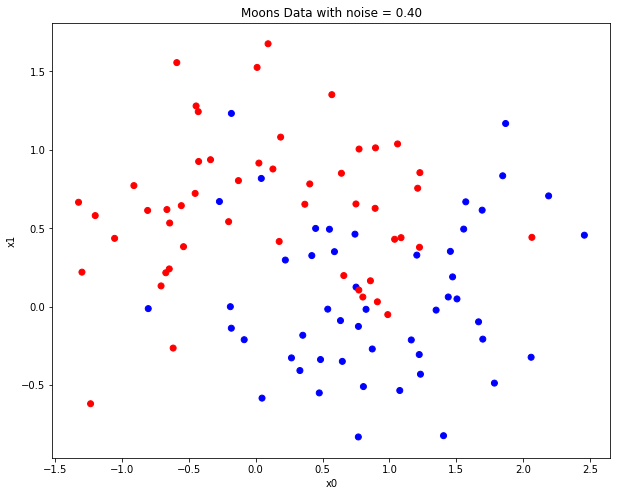

In [3]:
colors = ["red" if label == 0 else "blue" for label in y]

features = ["x0", "x1"]
labels = ["red", "blue"]


plt.figure(figsize =(10,8))
plt.scatter(X[:,0],X[:,1], c = colors)
plt.xlabel("x0")
plt.ylabel("x1")
plt.title("Moons Data with noise = 0.40")
plt.show()

---

Because we are concerned with how our ML models perform on out of sample data, we next use ```sklearn.model_selection.train_test_split``` to partition our data into training and testing subsets. Documentation of this function can be found at [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split)

---

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = .3,
                                                   random_state = 3)

train_colors = ["red" if label == 0 else "blue" for label in y_train]
test_colors = ["red" if label == 0 else "blue" for label in y_test]

---

Next we import the decision tree model from sklearn (```sklearn.tree.DecisionTreeClassifier```). Documentation can be found at [decision tree](https://scikit-learn.org/stable/modules/tree.html). We choose the keyword argument```max_depth=3``` arbitrarily. Note, all models in sklearn have a fit method, which is equivalent to training the model on our input data. This is also shown in the following code cell.

---

In [6]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth = 3, random_state = 3)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=3)

---

Unlike many other supervised machine learning algorithms, decision trees have a clear interpretation as to how predictions are made. This can be visualized using ```sklearn.tree.plot_tree```. We give an example with the following code cell.

---

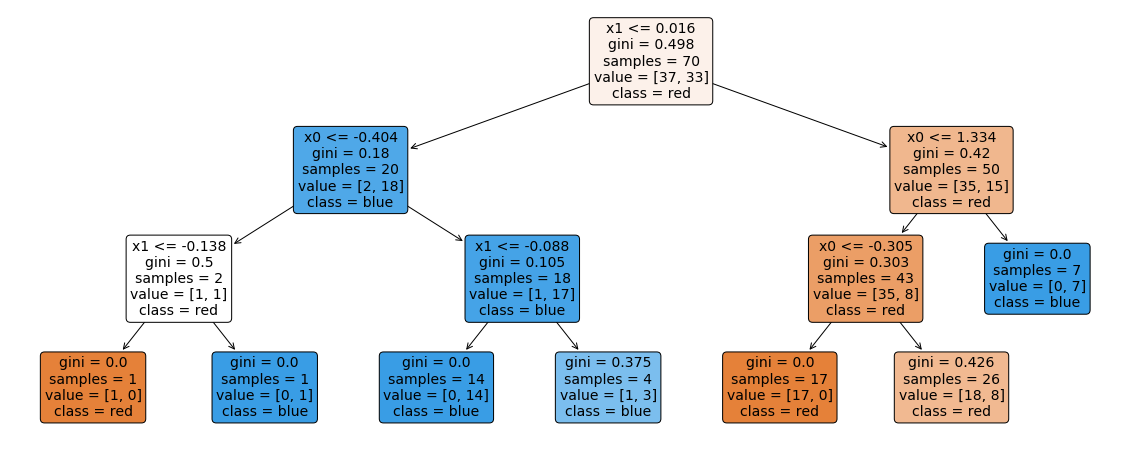

In [7]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,8))
plot_tree(decision_tree, 
              feature_names = features,
              class_names = labels,
              rounded = True,
              filled = True,
              fontsize = 14)

plt.show()

---

We can also visualize the decision tree structure with text by using ```sklearn.tree.export_text```. Documentation can be found at [export_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_text.html) The following code cell illustrates this.

---

In [8]:
from sklearn.tree import export_text

tree_rules = export_text(decision_tree,
                        feature_names = features)

print(tree_rules)

|--- x1 <= 0.02
|   |--- x0 <= -0.40
|   |   |--- x1 <= -0.14
|   |   |   |--- class: 0
|   |   |--- x1 >  -0.14
|   |   |   |--- class: 1
|   |--- x0 >  -0.40
|   |   |--- x1 <= -0.09
|   |   |   |--- class: 1
|   |   |--- x1 >  -0.09
|   |   |   |--- class: 1
|--- x1 >  0.02
|   |--- x0 <= 1.33
|   |   |--- x0 <= -0.30
|   |   |   |--- class: 0
|   |   |--- x0 >  -0.30
|   |   |   |--- class: 0
|   |--- x0 >  1.33
|   |   |--- class: 1



---

In classification, decision boundaries correspond to regions of space for which all points in a given region belong to exactly one predicted class. This is true for any supervised learning algorithm, not necessarily just decision trees. However, we use our decision tree model to illustrate the point. The following code cell does this.

---

Text(0, 0.5, 'x1')

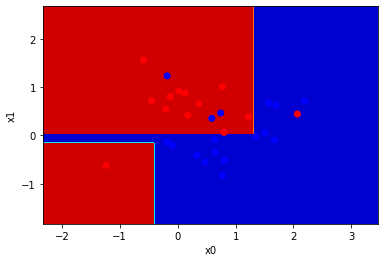

In [9]:
plot_step = 0.02

#plt.figure(figsize=(10, 8))
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = decision_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap="jet_r")

plt.scatter(X_test[:, 0], X_test[:, 1], c = test_colors)
plt.xlabel("x0")
plt.ylabel("x1")



---

As can be seen from the above plot, there are several blues predicted to be red and a few less reds predicted to be blue. We can quantify these visual observations, with a matrix called a **confusion matrix**. The confusion matrix exposes the following of our predictions

- true positives: predicted true and actually true
- false positives: predicted true and actually false
- false negatives: predicted false and actually true
- true negatives: predicted false and actually false

----

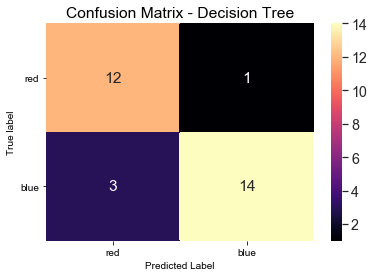

In [10]:
test_pred_decision_tree = decision_tree.predict(X_test)

from sklearn import metrics
import seaborn as sns
import pandas as pd

confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)
matrix_df = pd.DataFrame(confusion_matrix)

ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
            annot = True,
            fmt = "g",
            ax = ax,
            cmap = "magma")
ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted Label", fontsize = 10)
ax.set_xticklabels(labels)
ax.set_ylabel("True label", fontsize = 10)
ax.set_yticklabels(labels, rotation = 0)
plt.show()

---

**Accuracy**. Accuracy is defined as:

$$
\text{accuracy}(y,\hat{y}) = \frac{1}{n_{samples}} \sum_{i = 0}^{n_{samples}-1} 1(\hat{y}_{i} = y_{i})
$$

---

In [11]:
from sklearn.metrics import accuracy_score

print(f"accuracy score = {accuracy_score(y_test, test_pred_decision_tree)}")

accuracy score = 0.8666666666666667


--- 

**Precision** Precision tells us how many of the values our model predicted to be in a certain class are actually in that class.

The equation for precision is:

$\text{precision} = \frac{TP}{TP + FP}$

where:
- TP = True Positive
- FP = False Positive

---

In [13]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, 
                            test_pred_decision_tree,
                            average = None)

precision_results = pd.DataFrame(precision, index=labels)
precision_results.rename(columns = {0: "precision"}, inplace =True)
precision_results

,precision
red,0.800000
blue,0.933333


---

From our precision scores above we were 93% precise for our blue data, and 80% precise for our red data.

---